In [132]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from pydataset import data
import scipy
import os
from sklearn.model_selection import train_test_split
# turn off pink boxes for demo
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, f1_score, fbeta_score, make_scorer
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
from acquire import get_telco_data
from prepare import split_telco_data
from prep import prep_telco
from prepare import count_percentage_subplots
from prepare import model_metrics

# Telco Data has been renamed to df # 
## Plan ## 
## Outline of project ## 
The stakeholders at Telco have requested I as a data scientest to look more into the inner workings of the Telco data set. They desire more of a technical and mothodical approch to what drives churn in the daily workings at Telco. MAIN POINT where are the customers going 
1. What are the top drivers of customers leaving 

2. Create easy to read and to the point visualations 

3. What can we do better, what can we offer more to keep the customers from leaving 

## Goals 
1. Find and attack, inform what creates churn 

2. Create a ML classifcation model that helps and accurately depicts the levels of churn 

3. Present and deliver a report that everyone in the company can read and get on board with reducing churn 

# Acquire  #

In [61]:
df = get_telco_data()
df.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [62]:
X = df.drop(['churn'], axis = 1)
Y = df['churn']

In [63]:
x_trainer, x_tester, y_trainer, y_tester = train_test_split(X,Y, stratify = Y, test_size = 0.20, random_state= 42)

In [64]:
x_trainer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 3793 to 5679
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                5634 non-null   int64  
 1   payment_type_id           5634 non-null   int64  
 2   internet_service_type_id  5634 non-null   int64  
 3   contract_type_id          5634 non-null   int64  
 4   customer_id               5634 non-null   object 
 5   gender                    5634 non-null   object 
 6   senior_citizen            5634 non-null   int64  
 7   partner                   5634 non-null   object 
 8   dependents                5634 non-null   object 
 9   tenure                    5634 non-null   int64  
 10  phone_service             5634 non-null   object 
 11  multiple_lines            5634 non-null   object 
 12  online_security           5634 non-null   object 
 13  online_backup             5634 non-null   object 
 14  devic

In [65]:
x_trainer.describe()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000
mean,3510.116968,2.319311,1.870962,1.692226,0.161164,32.349663,65.032677
std,2044.454968,1.146825,0.735495,0.834452,0.367715,24.582641,30.023150
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,18.400000
25%,1733.250000,1.000000,1.000000,1.000000,0.000000,9.000000,38.312500
50%,3487.500000,2.000000,2.000000,1.000000,0.000000,29.000000,70.525000
75%,5300.500000,3.000000,2.000000,2.000000,0.000000,55.000000,89.900000
max,7042.000000,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [66]:
train = pd.concat([x_trainer,  y_trainer], axis = 1)
train.shape

(5634, 25)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7043.0,3521.000000,2033.283305,0.00,1760.5,3521.00,5281.50,7042.00
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [69]:
df.tail()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
7038,7038,2,1,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,7040,2,1,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check
7042,7042,1,1,3,9995-HOTOH,Male,0,Yes,Yes,63,...,No,Yes,Yes,No,59.00,3707.6,No,Two year,DSL,Electronic check


In [70]:
def p_t(df):
    telco_columns_drop = ['contract_type','payment_type','internet_service_type','partner','phone_service','online_security','online_backup','device_protection','streaming_tv','streaming_movies']
    df = df.drop(columns= telco_columns_drop,axis=1)
    
    # turn to a float
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']
    df['total_charges'] = df.total_charges.astype('float')
    
    # dummmy columns
    dummy_df = pd.get_dummies(df[['gender','dependents','multiple_lines','tech_support','paperless_billing','churn']], dummy_na=False, drop_first=[True, True])
    
    #concat
    df = pd.concat([df, dummy_df], axis = 1)
    
    #train validate test
    train, validate, test = split_telco_data(df)

    return train, validate, test

In [71]:
train, validate, test = p_t(df)
train

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,dependents,tenure,multiple_lines,...,total_charges,churn,gender_Male,dependents_Yes,multiple_lines_No phone service,multiple_lines_Yes,tech_support_No internet service,tech_support_Yes,paperless_billing_Yes,churn_Yes
5919,5919,4,1,2,8331-ZXFOE,Female,0,No,58,Yes,...,4299.20,No,0,0,0,1,0,1,1,0
1915,1915,4,2,2,2790-XUYMV,Male,0,Yes,71,Yes,...,6028.95,No,1,1,0,1,0,0,1,0
5054,5054,1,3,1,7107-UBYKY,Female,0,Yes,35,Yes,...,882.55,No,0,1,0,1,1,0,1,0
2355,2355,2,3,1,3373-YZZYM,Male,0,Yes,1,No,...,19.20,No,1,1,0,0,1,0,0,0
6279,6279,2,1,2,8883-GRDWQ,Male,1,No,20,No,...,1055.90,No,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,394,4,2,1,0581-MDMPW,Female,0,No,24,Yes,...,2072.75,No,0,0,0,1,0,0,1,0
3763,3763,1,2,1,5299-RULOA,Female,0,Yes,10,Yes,...,1064.65,Yes,0,1,0,1,0,0,1,1
3444,3444,4,3,3,4883-KCPZJ,Female,0,Yes,22,Yes,...,555.40,No,0,1,0,1,1,0,0,0
1002,1002,4,2,1,1452-KIOVK,Male,0,Yes,22,Yes,...,1949.40,No,1,1,0,1,0,0,1,0


# Prepare # 

### prep the data ###

### Importing functions from prepare.py and prep.py ### 

1. We have removed the nulls in the df, but have had to replace the blank information. 

2. There is some information that is not relivent and has not been include for example: customers with tenure = 0, just means they have not yet had tome to pay there bills 

3. First is a list of values that need to be adjusted so they will properly fit in the model 

## List to change ## 

In [72]:
df.customer_id.unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

### Gender will change to Male = 1 and Female = 0 

In [73]:
df.gender.unique() 

array(['Female', 'Male'], dtype=object)

### Senior_citizen will be 1 = yes is a senior 0 = no is not a senior 

In [74]:
df.senior_citizen.unique()

array([0, 1])

### internet_service_type_id will equate to 1= DSL 2= Fiber optic 3 = None

In [75]:
df.internet_service_type_id.unique()

array([1, 2, 3])

### Contract type will equal 1 = month to month 2 = 1 year  3 = 2 year 

In [76]:
df.contract_type_id.unique()

array([2, 1, 3])

### Payment_type_id equates to 1 = Electronic Ck 2 = Mailed Ck 3 = Automatic bank transfer 4 = Credit automatic

In [77]:
df.payment_type_id.unique()

array([2, 1, 4, 3])

### Churn will change to if there is churn = 1 and if not = 0 

In [78]:
df.churn.unique()

array(['No', 'Yes'], dtype=object)

## Functions to Create to get the Ml to correctly analize the data ## 

In [79]:
pd.crosstab(df.gender, train.gender_Male)

gender_Male,0,1
gender,,
Female,1961,0
Male,0,1976


In [80]:
pd.crosstab(df.senior_citizen, train.senior_citizen)

senior_citizen,0,1
senior_citizen,,
0,3302,0
1,0,635


In [81]:
pd.crosstab(df.churn, train.senior_citizen)

senior_citizen,0,1
churn,,
No,2527,364
Yes,775,271


In [82]:
pd.crosstab(train.churn_Yes, df.churn)

churn,No,Yes
churn_Yes,,
0,2891,0
1,0,1046


In [83]:
pd.crosstab(df.internet_service_type, df.internet_service_type_id)

internet_service_type_id,1,2,3
internet_service_type,,,
DSL,2421,0,0
Fiber optic,0,3096,0
None,0,0,1526


In [84]:
pd.crosstab(df.internet_service_type, train.internet_service_type_id)

internet_service_type_id,1,2,3
internet_service_type,,,
DSL,1348,0,0
Fiber optic,0,1722,0
None,0,0,867


In [85]:
pd.crosstab(df.payment_type, df.internet_service_type_id)

internet_service_type_id,1,2,3
payment_type,,,
Bank transfer (automatic),566,646,332
Credit card (automatic),594,597,331
Electronic check,648,1595,122
Mailed check,613,258,741


In [86]:
pd.crosstab(df.payment_type, df.payment_type_id)

payment_type_id,1,2,3,4
payment_type,,,,
Bank transfer (automatic),0,0,1544,0
Credit card (automatic),0,0,0,1522
Electronic check,2365,0,0,0
Mailed check,0,1612,0,0


In [87]:
pd.crosstab(df.contract_type, df.payment_type_id)

payment_type_id,1,2,3,4
contract_type,,,,
Month-to-month,1850,893,589,543
One year,347,337,391,398
Two year,168,382,564,581


In [88]:
pd.crosstab(df.contract_type, df.contract_type_id)

contract_type_id,1,2,3
contract_type,,,
Month-to-month,3875,0,0
One year,0,1473,0
Two year,0,0,1695


## Data Exploration 

In [89]:
train = train.drop(columns= ['customer_id','dependents','gender','multiple_lines','tech_support','paperless_billing'])

train = train.replace({'Yes':1, 'No':0})

validate = validate.drop(columns= ['customer_id','dependents','gender','multiple_lines','tech_support','paperless_billing',])

validate = validate.replace({'Yes':1, 'No':0})



In [90]:
ttv = p_t(df)

In [91]:
train

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_Male,dependents_Yes,multiple_lines_No phone service,multiple_lines_Yes,tech_support_No internet service,tech_support_Yes,paperless_billing_Yes,churn_Yes
5919,5919,4,1,2,0,58,71.10,4299.20,0,0,0,0,1,0,1,1,0
1915,1915,4,2,2,0,71,85.45,6028.95,0,1,1,0,1,0,0,1,0
5054,5054,1,3,1,0,35,25.75,882.55,0,0,1,0,1,1,0,1,0
2355,2355,2,3,1,0,1,19.20,19.20,0,1,1,0,0,1,0,0,0
6279,6279,2,1,2,1,20,54.00,1055.90,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,394,4,2,1,0,24,88.95,2072.75,0,0,0,0,1,0,0,1,0
3763,3763,1,2,1,0,10,100.25,1064.65,1,0,1,0,1,0,0,1,1
3444,3444,4,3,3,0,22,25.25,555.40,0,0,1,0,1,1,0,0,0
1002,1002,4,2,1,0,22,89.10,1949.40,0,1,1,0,1,0,0,1,0


In [92]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3937.0,3510.525273,2052.340345,0.00,1705.0,3508.00,5295.0,7041.00
payment_type_id,3937.0,2.346203,1.155924,1.00,1.0,2.00,3.0,4.00
internet_service_type_id,3937.0,1.877826,0.740151,1.00,1.0,2.00,2.0,3.00
contract_type_id,3937.0,1.693167,0.836075,1.00,1.0,1.00,2.0,3.00
senior_citizen,3937.0,0.161290,0.367845,0.00,0.0,0.00,0.0,1.00
tenure,3937.0,32.775210,24.709604,1.00,9.0,30.00,56.0,72.00
monthly_charges,3937.0,64.805131,30.294804,18.25,34.7,70.25,90.3,118.65
total_charges,3937.0,2316.775641,2284.984394,18.85,396.1,1414.80,3893.6,8594.40
churn,3937.0,0.265685,0.441753,0.00,0.0,0.00,1.0,1.00
gender_Male,3937.0,0.501905,0.500060,0.00,0.0,1.00,1.0,1.00


In [93]:
x_trainer = train.drop(columns=['churn','churn_Yes'])
y_trainer = train.churn_Yes

X_validate = validate.drop(columns=['churn','churn_Yes'])
y_validate = validate.churn_Yes

X_test = test.drop(columns=['churn','churn_Yes'])
y_test = test.churn_Yes


In [94]:
train.churn.value_counts()

0    2891
1    1046
Name: churn, dtype: int64

Text(0.5, 0, 'Churn')

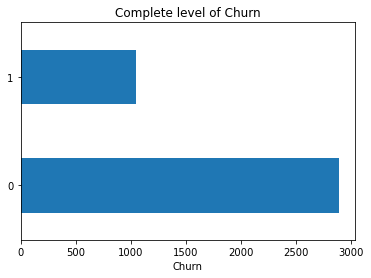

In [95]:
train.churn.value_counts().sort_index().plot.barh()
churn_rate = train.churn_Yes.mean()
plt.title("Complete level of Churn")
plt.xlabel ('Churn')

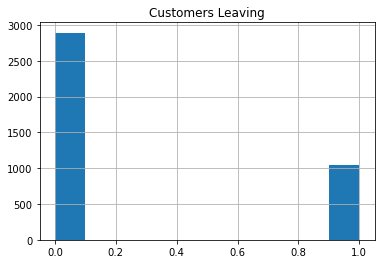

In [96]:
plt.title('Customers Leaving')
train.churn_Yes.hist()
plt.show()

### As we can see a little over 26% of our clients have churned  to a little over 1000 customers a month 

In [138]:
x_trainer.info

<bound method DataFrame.info of       Unnamed: 0  payment_type_id  internet_service_type_id  contract_type_id  \
5919        5919                4                         1                 2   
1915        1915                4                         2                 2   
5054        5054                1                         3                 1   
2355        2355                2                         3                 1   
6279        6279                2                         1                 2   
...          ...              ...                       ...               ...   
394          394                4                         2                 1   
3763        3763                1                         2                 1   
3444        3444                4                         3                 3   
1002        1002                4                         2                 1   
4192        4192                2                         3                 1

In [139]:
categorical_features= list(x_trainer.columns)
for con in ['tenure', 'monthly_charges', 'total_charges']:
  categorical_features.remove(con)

In [145]:
def ChiSquare( data, target, categorical_features):
    
    # Creating an empty list of final selected predictors
    RemoveFeatures=[]

    print('The ChiSquare result are : \n')
    for feature in categorical_features:
        CrossTabResult=pd.crosstab(index = data[target], columns=data[feature])
        pvalue = stats.chi2_contingency(CrossTabResult)[1]
        # print(Result)
        # If the ChiSquare P-Value is <0.05, that means we reject H0
        if (pvalue < 0.05):
            print(feature, 'is correlated with', target, '| P-Value:', pvalue)
        else:
            print(feature, 'is \033[1m NOT \033[0m correlated with', target, '| P-Value:', pvalue)   
            RemoveFeatures.append(feature)     
    print("\n\n")
    return(RemoveFeatures)

In [146]:
remove_features_cat = ChiSquare(data = train, target = 'churn', categorical_features = categorical_features)
print("Features to be removed are :",remove_features_cat)

The ChiSquare result are : 

Unnamed: 0 is  NOT  correlated with churn | P-Value: 0.4925068035871357
payment_type_id is correlated with churn | P-Value: 4.64358817076333e-73
internet_service_type_id is correlated with churn | P-Value: 3.2062272759526154e-96
contract_type_id is correlated with churn | P-Value: 4.693667062132269e-145
senior_citizen is correlated with churn | P-Value: 1.7561315684822571e-23
gender_Male is  NOT  correlated with churn | P-Value: 1.0
dependents_Yes is correlated with churn | P-Value: 1.5385742575781703e-24
multiple_lines_No phone service is  NOT  correlated with churn | P-Value: 0.3490605904235853
multiple_lines_Yes is correlated with churn | P-Value: 0.0009985216252164028
tech_support_No internet service is correlated with churn | P-Value: 2.8653012180661676e-47
tech_support_Yes is correlated with churn | P-Value: 2.376480997030356e-23
paperless_billing_Yes is correlated with churn | P-Value: 1.3393723943150956e-32



Features to be removed are : ['Unnamed:

In [147]:
x_trainer.drop(remove_features_cat, axis = 1, inplace = True)
x_trainer.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,dependents_Yes,multiple_lines_Yes,tech_support_No internet service,tech_support_Yes,paperless_billing_Yes
5919,4,1,2,0,58,71.10,4299.20,0,1,0,1,1
1915,4,2,2,0,71,85.45,6028.95,1,1,0,0,1
5054,1,3,1,0,35,25.75,882.55,1,1,1,0,1


# I will present a number of visuals based off of our data to prove my evalutions 

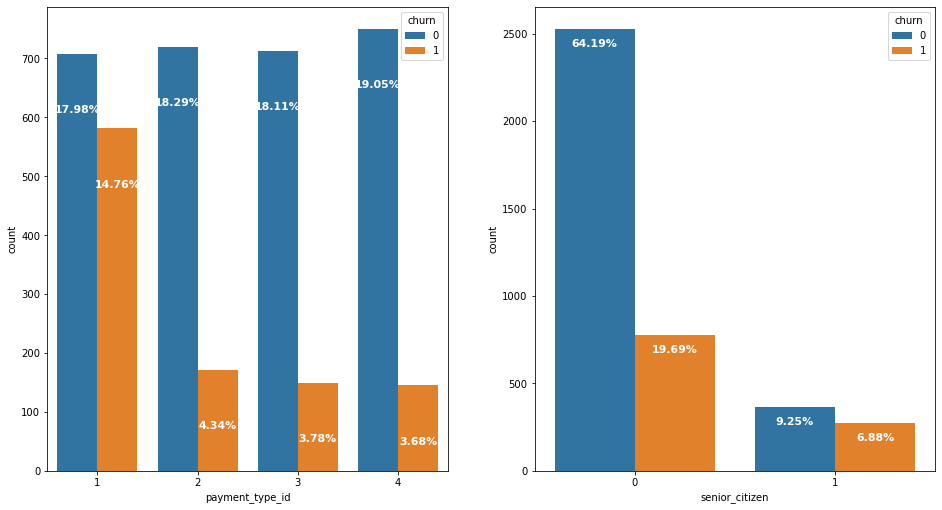

In [97]:
count_percentage_subplots(['payment_type_id', 'senior_citizen'],1,2, 'churn', train, figsize_row = 14, figsize_col = 8 )

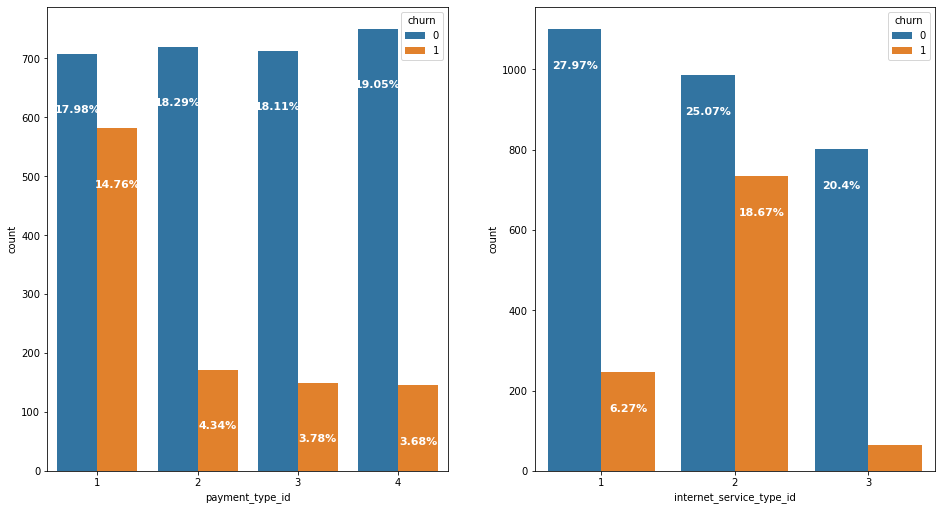

In [98]:
count_percentage_subplots(['payment_type_id', 'internet_service_type_id'],1,2, 'churn', train, figsize_row = 14, figsize_col = 8 )

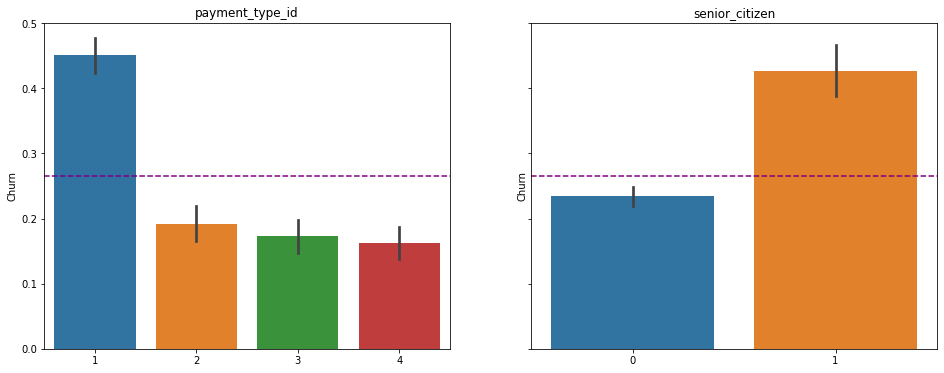

In [99]:
Change = ['payment_type_id', 'senior_citizen']
_, ax = plt.subplots(nrows = 1, ncols = 2, figsize =(16, 6), sharey = True)
for i, feature in enumerate(Change):
    sns.barplot(feature,'churn_Yes', data = train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls = '--', color= 'purple')

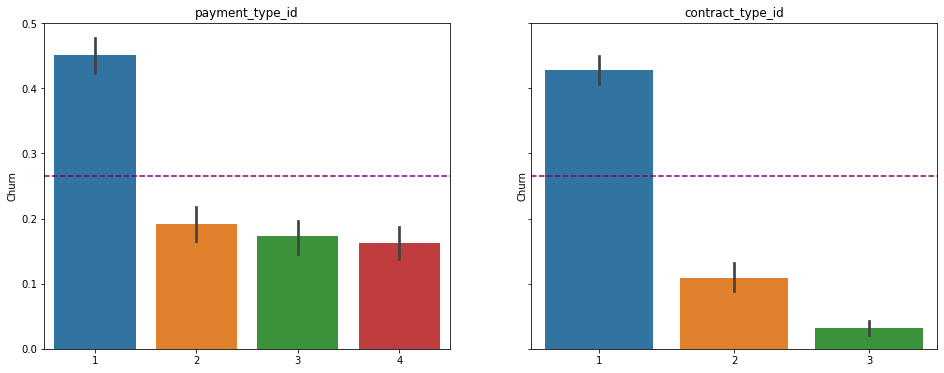

In [100]:
Change = ['payment_type_id', 'contract_type_id']
_, ax = plt.subplots(nrows = 1, ncols = 2, figsize =(16, 6), sharey = True)
for i, feature in enumerate(Change):
    sns.barplot(feature,'churn_Yes', data = train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls = '--', color= 'purple')

In [101]:
#mapplot.annot#

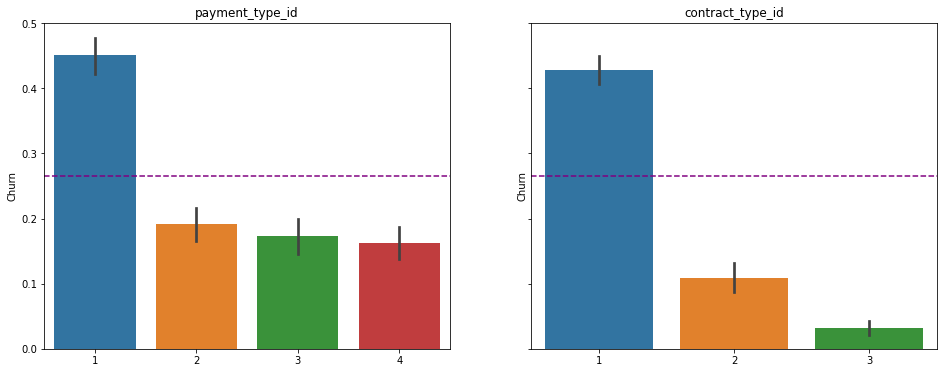

In [102]:
Change = ['payment_type_id', 'contract_type_id']
_, ax = plt.subplots(nrows = 1, ncols = 2, figsize =(16, 6), sharey = True)
for i, feature in enumerate(Change):
    sns.barplot(feature,'churn_Yes', data = train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls = '--', color= 'purple')

# Stats Breakdown of Change 

In [103]:
alpha = 0.01

## Payment type
### Intital Hypotheses

_(H_O)_:Rate of churn is not dependent on the payment type 


_(H_a)_:Rate of churn is dependent on the payment type 

In [104]:
churn_payment_type = pd.crosstab(train.payment_type_id, train.churn)
churn_payment_type

churn,0,1
payment_type_id,,
1,708,581
2,720,171
3,713,149
4,750,145


In [105]:
chi2, p_payment , degf, expected_payment = stats.chi2_contingency(churn_payment_type)
print(expected_payment)
print(f"p-val: {p_payment}")

[[946.53263907 342.46736093]
 [654.27508255 236.72491745]
 [632.97993396 229.02006604]
 [657.21234442 237.78765558]]
p-val: 4.64358817076333e-73


In [106]:
if p_payment < alpha:
    print("Rate of churn is not dependent on the payment type.")
else:
    print("Rate of churn is dependent on the payment type." )

Rate of churn is not dependent on the payment type.


##  Contract_type_id

### Intital Hypotheses

_(H_O)_:Rate of churn is not dependent on the contract_type 


_(H_a)_:Rate of churn is dependent on the contract_type 



In [107]:
n_contract_type = pd.crosstab(train.contract_type_id, train.churn)
n_contract_type

churn,0,1
contract_type_id,,
1,1238,927
2,726,89
3,927,30


In [108]:
chi2, p_n, degf, expected_n = stats.chi2_contingency(n_contract_type)
print(expected_n)
print(f"p-val: {p_n}")

[[1589.79298959  575.20701041]
 [ 598.46710693  216.53289307]
 [ 702.73990348  254.26009652]]
p-val: 4.693667062132269e-145


In [109]:
if p_n < alpha:
    print("Rate of churn is not dependent on contract type.")
else:
    print("Rate of churn is dependent on contract type.")

Rate of churn is not dependent on contract type.


## Senior_Citizen

### Intital Hypotheses

_(H_O)_:Rate of churn is not dependent on the Senior_Citizen


_(H_a)_:Rate of churn is dependent on the Senior_Citizen



In [110]:
o_senior = pd.crosstab(train.senior_citizen, train.churn)
o_senior

churn,0,1
senior_citizen,,
0,2527,775
1,364,271


In [111]:
chi2, p_o, degf, expected_o = stats.chi2_contingency(o_senior)
print(expected_o)
print(f"p-val: {p_o}")

[[2424.70967742  877.29032258]
 [ 466.29032258  168.70967742]]
p-val: 1.7561315684822695e-23


In [112]:
if p_o < alpha:
    print("Rate of churn is not dependent on senior_citizen.")
else:
    print("Rate of churn is dependent on senior_citizen.")

Rate of churn is not dependent on senior_citizen.


## internet_service_type_id

### Intital Hypotheses

_(H_O)_:Rate of churn is not dependent on the internet_service_type_id

_(H_a)_:Rate of churn is dependent on the internet_service_type_id

In [113]:
t_internet_service_type = pd.crosstab(train.internet_service_type_id, train.churn)
t_internet_service_type

churn,0,1
internet_service_type_id,,
1,1101,247
2,987,735
3,803,64


In [114]:
chi2, p_t, degf, expected_t = stats.chi2_contingency(t_internet_service_type)
print(expected_t)
print(f"p-val: {p_t}")

[[ 989.85725171  358.14274829]
 [1264.49123698  457.50876302]
 [ 636.6515113   230.3484887 ]]
p-val: 3.2062272759526154e-96


In [115]:
if p_t < alpha:
    print("Rate of churn is not dependent on internet_service_type_id.")
else:
    print("Rate of churn is dependent on internet_service_type_id.")

Rate of churn is not dependent on internet_service_type_id.


In [116]:
categorical_features= list(x_trainer.columns)
for con in ['tenure', 'monthly_charges', 'total_charges']:
  categorical_features.remove(con)

In [117]:
def ChiSquare( data, target, categorical_features):
    
    # Creating an empty list of final selected predictors
    RemoveFeatures=[]

    print('The ChiSquare result are : \n')
    for feature in categorical_features:
        CrossTabResult=pd.crosstab(index = data[target], columns=data[feature])
        pvalue = chi2_contingency(CrossTabResult)[1]
        # print(Result)
        # If the ChiSquare P-Value is <0.05, that means we reject H0
        if (pvalue < 0.05):
            print(feature, 'is correlated with', target, '| P-Value:', pvalue)
        else:
            print(feature, 'is \033[1m NOT \033[0m correlated with', target, '| P-Value:', pvalue)   
            RemoveFeatures.append(feature)     
    print("\n\n")
    return(RemoveFeatures)

# Modeling 

In [119]:
def confusion_matrix(Y_test, pred):
  cm = confusion_matrix(y_test, pred)
  
  df_cm = pd.df(cm, [0,1], [0,1])
  plt.figure(figsize=(5,3))
  sns.set(font_scale=1.4) 
  sns.heatmap(df_cm, annot=True, fmt='g', cbar=False, cmap="PuRd") # font size , annot_kws={"size": 16}
  plt.title('Confusion Matrix\n', y=1.1)
  plt.ylabel('Actual label\n')
  plt.xlabel('Predicted label\n')

  plt.show()

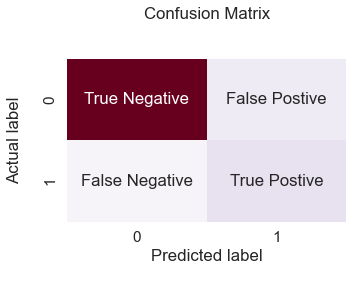

In [120]:
# the above function will return confusion matrix with values in the following format 
df_cm = pd.DataFrame([[1000,200],[150,250]],[0,1], [0,1])
annot_arr = np.array([['True Negative','False Postive'],['False Negative','True Postive']], dtype = str)
plt.figure(figsize=(5,3))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=annot_arr, fmt='s', cbar=False, cmap="PuRd") # font size , annot_kws={"size": 16}
plt.title('Confusion Matrix\n', y=1.1)
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
plt.show()

## Rules for how our models will be built and trained and evaluated
 
### _This dataset is tricky, and all our Hypotheses came back not the cause of churn .Our main objective is to find all the customers who churn. So True Positive is more important and we will take the F2-score as a weight.The F2 puts more attention on minimizing false negatives than minimizing false positives._ 


In [121]:
F2_score = make_scorer(fbeta_score, beta=2) 

In [122]:
model_performance_after_hypertuning = pd.DataFrame(columns = ['model_name' ,'acc', 'precision', 'recall', 'f1', 'f2'])

In [123]:
def model_metrics(table_name,model_name, y_test, pred, print_cm , print_cr):
  if print_cm == True:
    plot_confusion_matrix(y_test, pred)
    print("\n")
  if print_cr == True:
    print(classification_report(y_test, pred),"\n")

  acc = round( accuracy_score(y_test, pred),4)
  precision = round(precision_score(y_test, pred),4)
  recall = round(recall_score(y_test, pred),4)
  f1 = round(f1_score(y_test, pred),4)
  f2 = round(fbeta_score(y_test, pred, beta = 2),4)

  table_name.loc[table_name.shape[0]] = [model_name ,acc, precision, recall, f1, f2]

In [127]:
model_performance_without_hypertuning = pd.DataFrame(columns = ['model_name' ,'acc', 'precision', 'recall', 'f1', 'f2'])

In [128]:
model_performance_after_hypertuning = pd.DataFrame(columns = ['model_name' ,'acc', 'precision', 'recall', 'f1', 'f2'])

In [133]:
models_without_hp = []

models_without_hp.append(('Logistic Regression', LogisticRegression(random_state = 42)))

models_without_hp.append(('Linear SVC', SVC(kernel = 'linear', random_state = 42)))

models_without_hp.append(('Kernal SVC', SVC(kernel = 'rbf', random_state = 42)))

models_without_hp.append(('KNN', KNeighborsClassifier()))

models_without_hp.append(('Random Forest', RandomForestClassifier(random_state = 42)))

models_without_hp.append(('Adaboost', AdaBoostClassifier(random_state = 42)))

In [135]:
for name, model in models_without_hp:
  
  md = model.fit(x_trainer, y_trainer)
  pred = md.predict(x_tester)

  model_metrics(model_performance_without_hypertuning, name, y_tester, pred, False, False)

model_performance_without_hypertuning

ValueError: could not convert string to float: '0668-OGMHD'

In [124]:
log_reg = LogisticRegression(random_state = 42, max_iter= 1000)

param_dist = {
    'C' : [0.0001,0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty' : ['l1', 'l2',None]
}

log_reg_hp =  RandomizedSearchCV(log_reg , param_distributions = param_dist ,  scoring = F2_score , cv = 5, random_state= 42)
result1 = log_reg_hp.fit(x_trainer, y_trainer)

In [125]:
print(result1.best_estimator_)

LogisticRegression(C=10.0, max_iter=1000, random_state=42)
